# Loading Packages / Preparing Environment

In [1]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import cufflinks as cf
import plotly
import datetime
import math
import matplotlib
import sklearn
from IPython.display import HTML
import pickle
import os

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Print versions of libraries
print(f"Numpy version : Numpy {np.__version__}")
print(f"Pandas version : Pandas {pd.__version__}")
print(f"Matplotlib version : Matplotlib {matplotlib.__version__}")
print(f"Seaborn version : Seaborn {sns.__version__}")
print(f"SkLearn version : SkLearn {sklearn.__version__}")
# print(f"Cufflinks version : cufflinks {cf.__version__}")
print(f"Plotly version : plotly {plotly.__version__}")

# Magic Functions for In-Notebook Display
# %matplotlib inline

%matplotlib inline

# Setting seabon style
sns.set(style='darkgrid', palette='colorblind')

Numpy version : Numpy 1.18.1
Pandas version : Pandas 1.0.1
Matplotlib version : Matplotlib 3.1.3
Seaborn version : Seaborn 0.10.0
SkLearn version : SkLearn 0.23.2
Plotly version : plotly 4.9.0


# Importing Dataset into Python 

In [2]:
df = pd.read_csv('F:\\Faroque Ahmed\\Big Data Papers\\Dataset\\vlad-credit-card-fraud-detection\\original\\CC.csv', encoding='latin_1')


# Converting all column names to lower case
df.columns = df.columns.str.lower()

df.head()


,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Distribution of Amount

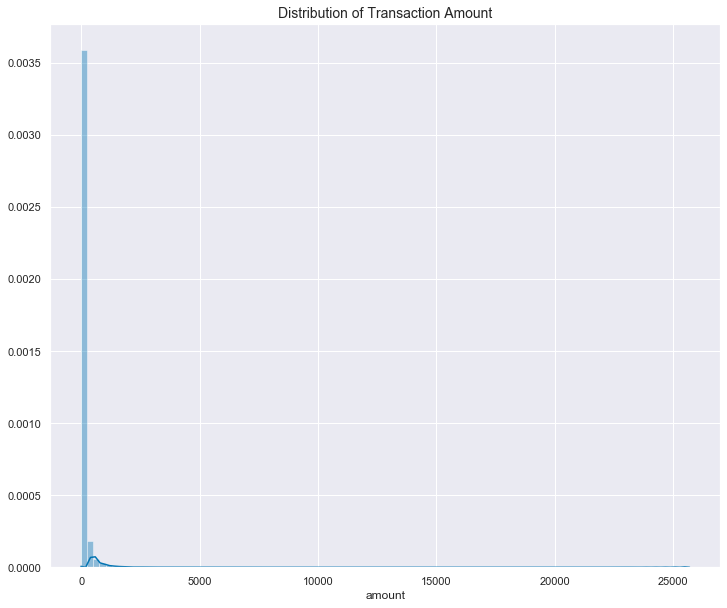

In [4]:
plt.figure(figsize=(12,10))
plt.title('Distribution of Transaction Amount', fontsize=14)
sns.distplot(df['amount'], bins=100)
plt.show()

Most the transaction amount falls between 0 and about 3000 and we have some outliers for really big amount transactions and it may actually make sense to drop those outliers in our analysis if they are just a few points that are very extreme.

Most daily transactions are not extremely expensive, but it’s likely where most fraudulent transactions are occurring as well.

# Removal of Outliers

The main objective is to remove "extreme outliers" from Amount Feature, rather than just outliers as we have seen that the distribution of amount is highly skewed after about $3000 and another reason to remove the extreme outliers is that dataset is highly imbalanced and we do not want to take risk of removing the class which is already less in number. We have to be careful as to how far do we want the threshold for removing outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the fewer outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect.

In [3]:
Q3 = np.percentile(df['amount'], 75)
Q1 = np.percentile(df['amount'], 25)

cutoff = 5.0

# calculate interquartrile range - IQR = thirdQuartile - firstQuartile
IQR = (Q3 - Q1)
    
# Usually we take scale value of 1.5 times IQR to calculate. But this scale depends on the distribution 
# followed by the data. 

# Say if my data seem to follow exponential distribution then this scale would change.   
# So I am taking sacle from 1.5 to 5.

# Lower outlier boundry (LOB) / Lower Whisker 
LOB = Q1 - (IQR * cutoff)
print(f"Lower Whisker : {LOB}")
    
# Upper outlier boundry (UOB) / Upper Whisker
UOB = Q3 + (IQR * cutoff)
print(f"Upper Whisker : {UOB}")

amtAllOutliers = df[(df['amount'] < LOB) | (df['amount'] > UOB)]['amount']
amtFrdOutliers = df[(df['class'] == 1) & ((df['amount'] < LOB) | (df['amount'] > UOB))]['amount']
amtGenuOutliers = df[(df['class'] == 0) & ((df['amount'] < LOB) | (df['amount'] > UOB))]['amount']

print('\n')
print("No of amount outliers : ", amtAllOutliers.count())
print("No of fraud amount outliers : ", amtFrdOutliers.count())
print("No of genuine amount outliers : ", amtGenuOutliers.count())
# print("Percentage of outliers : ", round((amtGenuOutliers.count()/len(df))*100,2))
print("Percentage of Fraud amount outliers : ", round((amtFrdOutliers.count()/amtAllOutliers.count())*100,2))

Lower Whisker : -352.22499999999997
Upper Whisker : 434.99


No of amount outliers :  11366
No of fraud amount outliers :  41
No of genuine amount outliers :  11325
Percentage of Fraud amount outliers :  0.36


In [4]:
# Deleting Outliers
# check shape before deleting outliers
df.shape

(284807, 31)

In [5]:
# Removing outliers
df = df.drop(amtAllOutliers.index)

In [6]:
# check shape after deleting outliers
df.shape

(273441, 31)

In [7]:
df.reset_index(inplace = True , drop = True)

# Scaling amount by Log

Scaling using the log: There are two main reasons to use logarithmic scales in charts and graphs.

The first is to respond to skewness towards large values; i.e., cases in which one or a few points are much larger than the bulk of the data.

The second is to show percent change or multiplicative factors. 

In [8]:
# Scale amount by log
df['amount_log'] = np.log(df.amount + 0.01)
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v22,v23,v24,v25,v26,v27,v28,amount,class,amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.008166
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.993252
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.936665
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.816322
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.248495


# **Splitting data into Training and Testing samples**

We don't use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as training data and the rest 30% is used as testing data.

In [10]:
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class', 'amount_log'],
      dtype='object')

In [9]:
# Separate Target Variable and Predictor Variables
# Here I am keeping the log amount and dropping the amount column.

X = df.drop(['time','class','amount'],axis=1)
y = df['class']

X

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount_log
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008166
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.993252
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936665
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816322
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273436,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.248461
273437,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,3.210844
273438,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,4.217889
273439,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,2.303585


In [10]:
y

0         0
1         0
2         0
3         0
4         0
         ..
273436    0
273437    0
273438    0
273439    0
273440    0
Name: class, Length: 273441, dtype: int64

In [11]:
# Load the library for splitting the data
from sklearn.model_selection import train_test_split

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (191408, 29)
y_train -  (191408,)
X_test -  (82033, 29)
y_test -  (82033,)


# Modelling with different Methods

In [25]:
!pip install imblearn --user

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [12]:
# Import imbalace technique algorithims

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Building different models with different balanced datasets

### At first we generate sampled datasets using various techniques

In [13]:
# Undersampled Data

from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification

print('Original dataset shape %s' % Counter(y))

rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_under))

# Slit into train and test datasets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.3, random_state=0)

Original dataset shape Counter({0: 272990, 1: 451})
Resampled dataset shape Counter({0: 451, 1: 451})


In [14]:
# Oversampled Data

print('Original dataset shape %s' % Counter(y))

ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_over))

# Slit into train and test datasets
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.3, random_state=0)

Original dataset shape Counter({0: 272990, 1: 451})
Resampled dataset shape Counter({0: 272990, 1: 272990})


In [15]:
# SMOTE Data

print('Original dataset shape %s' % Counter(y))

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_smote))

# Slit into train and test datasets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)

Original dataset shape Counter({0: 272990, 1: 451})
Resampled dataset shape Counter({0: 272990, 1: 272990})


In [16]:
# ADASYN Data

print('Original dataset shape %s' % Counter(y))

adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_adasyn))

# Slit into train and test datasets
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.3, random_state=0)

Original dataset shape Counter({0: 272990, 1: 451})
Resampled dataset shape Counter({1: 273021, 0: 272990})


# Building the models

## At first we import required libraries

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Defining a looped function 

In [18]:
names_lst = []
aucs_lst = []
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []

# Function for model building and performance measure

def build_measure_model(models):
    plt.figure(figsize=(12,6))

    for name, model,Xdata,ydata in models:
        
        names_lst.append(name)

        # split data in train test set
        X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.3, random_state=0)
        # Build model
        model.fit(X_train, y_train)
        # Predict
        y_pred = model.predict(X_test)

        # calculate accuracy
        Accuracy = metrics.accuracy_score(y_pred , y_test)
        accuracy_lst.append(Accuracy)

        # calculate auc
        Aucs = metrics.roc_auc_score(y_test , y_pred)
        aucs_lst.append(Aucs)

        # calculate precision
        PrecisionScore = metrics.precision_score(y_test , y_pred)
        precision_lst.append(PrecisionScore)

        # calculate recall
        RecallScore = metrics.recall_score(y_test , y_pred)
        recall_lst.append(RecallScore)

        # calculate f1 score
        F1Score = metrics.f1_score(y_test , y_pred)
        f1_lst.append(F1Score)

        #print('F1 Score of '+ name +' model : {0:0.5f}'.format(F1Score))

        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test , y_pred)

        print("Model Name :", name)
        print('Accuracy :{0:0.5f}'.format(Accuracy)) 
        print('AUC : {0:0.5f}'.format(Aucs))
        print('Precision : {0:0.5f}'.format(PrecisionScore))
        print('Recall : {0:0.5f}'.format(RecallScore))
        print('F1 : {0:0.5f}'.format(F1Score))
        print('Confusion Matrix : \n', cnf_matrix)
        print("\n")


        # plot ROC Curve
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
        auc = metrics.roc_auc_score(y_test, y_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
    
        #---------- For loops ends here--------#


    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Predicting a credit card fraud detection')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

# Logistic Regression (LR) 

Model Name : LR imbalance
Accuracy :0.99926
AUC : 0.81978
Precision : 0.87879
Recall : 0.63971
F1 : 0.74043
Confusion Matrix : 
 [[81885    12]
 [   49    87]]


Model Name : LR Undersampling
Accuracy :0.93358
AUC : 0.93497
Precision : 0.96947
Recall : 0.90071
F1 : 0.93382
Confusion Matrix : 
 [[126   4]
 [ 14 127]]


Model Name : LR Oversampling
Accuracy :0.95090
AUC : 0.95095
Precision : 0.97897
Recall : 0.92175
F1 : 0.94950
Confusion Matrix : 
 [[80148  1624]
 [ 6418 75604]]


Model Name : LR SMOTE
Accuracy :0.94889
AUC : 0.94894
Precision : 0.97784
Recall : 0.91877
F1 : 0.94738
Confusion Matrix : 
 [[80064  1708]
 [ 6663 75359]]


Model Name : LR ADASYN
Accuracy :0.89180
AUC : 0.89183
Precision : 0.91157
Recall : 0.86807
F1 : 0.88929
Confusion Matrix : 
 [[74901  6905]
 [10818 71180]]




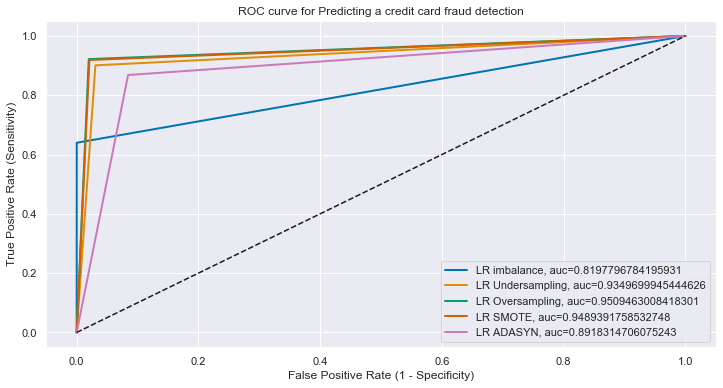

In [23]:
#------------------ Logistic Regression (LR) ------------------#
LRmodels = []

LRmodels.append(('LR imbalance', LogisticRegression(solver='liblinear', multi_class='ovr'),X,y))
LRmodels.append(('LR Undersampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_under,y_under))
LRmodels.append(('LR Oversampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_over,y_over))
LRmodels.append(('LR SMOTE', LogisticRegression(solver='liblinear', multi_class='ovr'),X_smote,y_smote))
LRmodels.append(('LR ADASYN', LogisticRegression(solver='liblinear', multi_class='ovr'),X_adasyn,y_adasyn))

# Call function to create model and measure its performance
build_measure_model(LRmodels)


# Decision Tree (DT)

Model Name : DT imbalance
Accuracy :0.99904
AUC : 0.87840
Precision : 0.69128
Recall : 0.75735
F1 : 0.72281
Confusion Matrix : 
 [[81851    46]
 [   33   103]]


Model Name : DT Undersampling
Accuracy :0.91144
AUC : 0.91189
Precision : 0.92701
Recall : 0.90071
F1 : 0.91367
Confusion Matrix : 
 [[120  10]
 [ 14 127]]


Model Name : DT Oversampling
Accuracy :0.99976
AUC : 0.99976
Precision : 0.99952
Recall : 1.00000
F1 : 0.99976
Confusion Matrix : 
 [[81733    39]
 [    0 82022]]


Model Name : DT SMOTE
Accuracy :0.99833
AUC : 0.99833
Precision : 0.99766
Recall : 0.99901
F1 : 0.99834
Confusion Matrix : 
 [[81580   192]
 [   81 81941]]


Model Name : DT ADASYN
Accuracy :0.99879
AUC : 0.99879
Precision : 0.99820
Recall : 0.99939
F1 : 0.99879
Confusion Matrix : 
 [[81658   148]
 [   50 81948]]




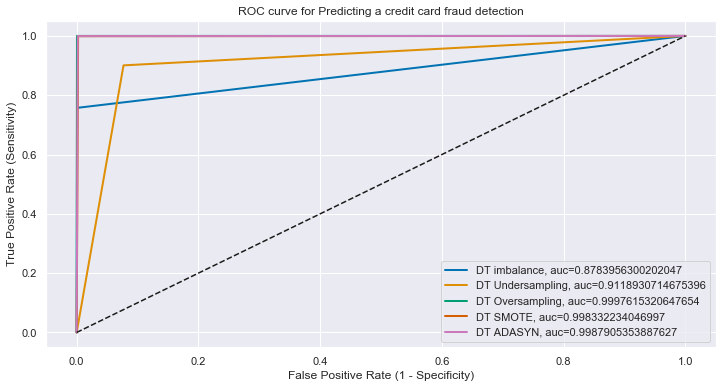

In [24]:
#-----------------Decision Tree (DT)------------------#
DTmodels = []

dt = DecisionTreeClassifier()

DTmodels.append(('DT imbalance', dt,X,y))
DTmodels.append(('DT Undersampling', dt,X_under,y_under))
DTmodels.append(('DT Oversampling', dt,X_over,y_over))
DTmodels.append(('DT SMOTE', dt,X_smote,y_smote))
DTmodels.append(('DT ADASYN', dt,X_adasyn,y_adasyn))

# Call function to create model and measure its performance
build_measure_model(DTmodels)


# Random Forest (RF)

Model Name : RF imbalance
Accuracy :0.99961
AUC : 0.90070
Precision : 0.95614
Recall : 0.80147
F1 : 0.87200
Confusion Matrix : 
 [[81892     5]
 [   27   109]]


Model Name : RF Undersampling
Accuracy :0.93358
AUC : 0.93587
Precision : 0.99200
Recall : 0.87943
F1 : 0.93233
Confusion Matrix : 
 [[129   1]
 [ 17 124]]


Model Name : RF Oversampling
Accuracy :0.99994
AUC : 0.99994
Precision : 0.99988
Recall : 1.00000
F1 : 0.99994
Confusion Matrix : 
 [[81762    10]
 [    0 82022]]


Model Name : RF SMOTE
Accuracy :0.99988
AUC : 0.99988
Precision : 0.99976
Recall : 1.00000
F1 : 0.99988
Confusion Matrix : 
 [[81752    20]
 [    0 82022]]


Model Name : RF ADASYN
Accuracy :0.99984
AUC : 0.99984
Precision : 0.99970
Recall : 0.99999
F1 : 0.99984
Confusion Matrix : 
 [[81781    25]
 [    1 81997]]




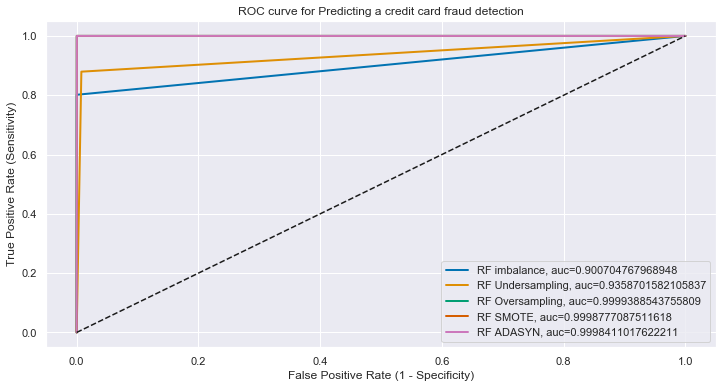

In [25]:
#-----------------Random Forest (RF) ------------------#
RFmodels = []

RFmodels.append(('RF imbalance', RandomForestClassifier(),X,y))
RFmodels.append(('RF Undersampling', RandomForestClassifier(),X_under,y_under))
RFmodels.append(('RF Oversampling', RandomForestClassifier(),X_over,y_over))
RFmodels.append(('RF SMOTE', RandomForestClassifier(),X_smote,y_smote))
RFmodels.append(('RF ADASYN', RandomForestClassifier(),X_adasyn,y_adasyn))

# Call function to create model and measure its performance
build_measure_model(RFmodels)

# Naive Bayes (NB)

Model Name : NB imbalance
Accuracy :0.97880
AUC : 0.91598
Precision : 0.06322
Recall : 0.85294
F1 : 0.11771
Confusion Matrix : 
 [[80178  1719]
 [   20   116]]


Model Name : NB Undersampling
Accuracy :0.92989
AUC : 0.93172
Precision : 0.97656
Recall : 0.88652
F1 : 0.92937
Confusion Matrix : 
 [[127   3]
 [ 16 125]]


Model Name : NB Oversampling
Accuracy :0.92797
AUC : 0.92804
Precision : 0.97374
Recall : 0.87989
F1 : 0.92444
Confusion Matrix : 
 [[79826  1946]
 [ 9852 72170]]


Model Name : NB SMOTE
Accuracy :0.92412
AUC : 0.92420
Precision : 0.97366
Recall : 0.87207
F1 : 0.92007
Confusion Matrix : 
 [[79837  1935]
 [10493 71529]]


Model Name : NB ADASYN
Accuracy :0.73531
AUC : 0.73557
Precision : 0.92066
Recall : 0.51568
F1 : 0.66108
Confusion Matrix : 
 [[78162  3644]
 [39713 42285]]




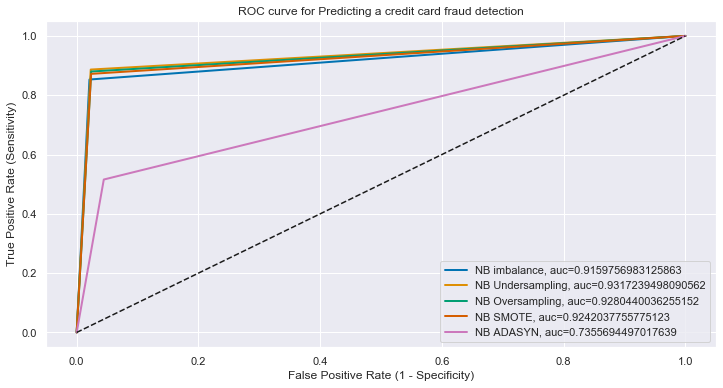

In [19]:
#------------------ Gaussian Naive Bayes (NB) ------------------#
NBmodels = []

NBmodels.append(('NB imbalance', GaussianNB(),X,y))
NBmodels.append(('NB Undersampling', GaussianNB(),X_under,y_under))
NBmodels.append(('NB Oversampling', GaussianNB(),X_over,y_over))
NBmodels.append(('NB SMOTE', GaussianNB(),X_smote,y_smote))
NBmodels.append(('NB ADASYN', GaussianNB(),X_adasyn,y_adasyn))

# Call function to create model and measure its performance
build_measure_model(NBmodels)

# Support Vector Machines (SVM)

Model Name : SVM imbalance
Accuracy :0.99933
AUC : 0.82716
Precision : 0.91753
Recall : 0.65441
F1 : 0.76395
Confusion Matrix : 
 [[81889     8]
 [   47    89]]


Model Name : SVM Undersampling
Accuracy :0.91882
AUC : 0.91959
Precision : 0.94074
Recall : 0.90071
F1 : 0.92029
Confusion Matrix : 
 [[122   8]
 [ 14 127]]


Model Name : SVM Oversampling
Accuracy :0.99913
AUC : 0.99913
Precision : 0.99827
Recall : 1.00000
F1 : 0.99914
Confusion Matrix : 
 [[81630   142]
 [    0 82022]]


Model Name : SVM SMOTE
Accuracy :0.99889
AUC : 0.99889
Precision : 0.99779
Recall : 1.00000
F1 : 0.99889
Confusion Matrix : 
 [[81590   182]
 [    0 82022]]


Model Name : SVM ADASYN
Accuracy :0.99872
AUC : 0.99872
Precision : 0.99757
Recall : 0.99988
F1 : 0.99872
Confusion Matrix : 
 [[81606   200]
 [   10 81988]]




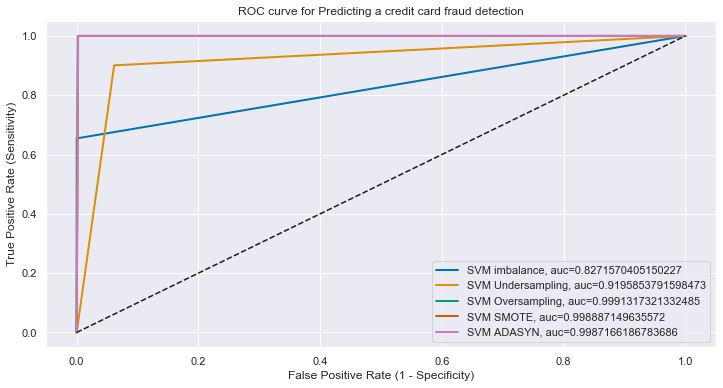

In [21]:
#------------------ Support Vector Machines (SVM) ------------------#
SVMmodels = []

SVMmodels.append(('SVM imbalance', SVC(gamma='auto'),X,y))
SVMmodels.append(('SVM Undersampling', SVC(gamma='auto'),X_under,y_under))
SVMmodels.append(('SVM Oversampling', SVC(gamma='auto'),X_over,y_over))
SVMmodels.append(('SVM SMOTE', SVC(gamma='auto'),X_smote,y_smote))
SVMmodels.append(('SVM ADASYN', SVC(gamma='auto'),X_adasyn,y_adasyn))

# Call function to create model and measure its performance
build_measure_model(SVMmodels)

# K-Nearest Neighbors (KNN)

Model Name : KNN imbalance
Accuracy :0.99960
AUC : 0.90437
Precision : 0.94017
Recall : 0.80882
F1 : 0.86957
Confusion Matrix : 
 [[81890     7]
 [   26   110]]


Model Name : KNN Undersampling
Accuracy :0.92620
AUC : 0.92848
Precision : 0.98400
Recall : 0.87234
F1 : 0.92481
Confusion Matrix : 
 [[128   2]
 [ 18 123]]


Model Name : KNN Oversampling
Accuracy :0.99967
AUC : 0.99967
Precision : 0.99934
Recall : 1.00000
F1 : 0.99967
Confusion Matrix : 
 [[81718    54]
 [    0 82022]]


Model Name : KNN SMOTE
Accuracy :0.99916
AUC : 0.99916
Precision : 0.99833
Recall : 1.00000
F1 : 0.99917
Confusion Matrix : 
 [[81635   137]
 [    0 82022]]


Model Name : KNN ADASYN
Accuracy :0.99916
AUC : 0.99916
Precision : 0.99832
Recall : 1.00000
F1 : 0.99916
Confusion Matrix : 
 [[81668   138]
 [    0 81998]]




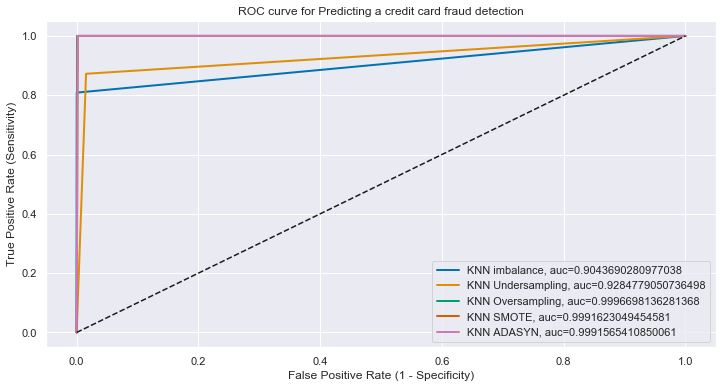

In [20]:
#------------------ K-Nearest Neighbors (KNN) ------------------#
KNNmodels = []

KNNmodels.append(('KNN imbalance', KNeighborsClassifier(),X,y))
KNNmodels.append(('KNN Undersampling', KNeighborsClassifier(),X_under,y_under))
KNNmodels.append(('KNN Oversampling', KNeighborsClassifier(),X_over,y_over))
KNNmodels.append(('KNN SMOTE', KNeighborsClassifier(),X_smote,y_smote))
KNNmodels.append(('KNN ADASYN', KNeighborsClassifier(),X_adasyn,y_adasyn))

# Call function to create model and measure its performance
build_measure_model(KNNmodels)

# Performance measures of various classifiers in a nutshell

In [26]:
data = {'Model':names_lst,
       'Accuracy':accuracy_lst,
       'AUC':aucs_lst,
       'PrecisionScore':precision_lst,
       'RecallScore':recall_lst,
       'F1Score':f1_lst}

print("Performance measures of various classifiers: \n")
performance_df = pd.DataFrame(data) 
performance_df.sort_values(['AUC','RecallScore','F1Score'],ascending=False)

Performance measures of various classifiers: 



,Model,Accuracy,AUC,PrecisionScore,RecallScore,F1Score
27,RF Oversampling,0.999939,0.999939,0.999878,1.000000,0.999939
28,RF SMOTE,0.999878,0.999878,0.999756,1.000000,0.999878
29,RF ADASYN,0.999841,0.999841,0.999695,0.999988,0.999841
22,DT Oversampling,0.999762,0.999762,0.999525,1.000000,0.999762
7,KNN Oversampling,0.999670,0.999670,0.999342,1.000000,0.999671
8,KNN SMOTE,0.999164,0.999162,0.998333,1.000000,0.999166
9,KNN ADASYN,0.999158,0.999157,0.998320,1.000000,0.999159
12,SVM Oversampling,0.999133,0.999132,0.998272,1.000000,0.999135
13,SVM SMOTE,0.998889,0.998887,0.997786,1.000000,0.998892
24,DT ADASYN,0.998791,0.998791,0.998197,0.999390,0.998793
